실습환경 준비

$ pip install pillow opencv-python matplotlib

$ mkdir -p ~/aiffel/python_image_proc/data

$ ln -s ~/data/* ~/aiffel/python_image_proc/data

$ ls ~/aiffel/python_image_proc/data  # 파일 확인


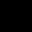

In [2]:
import numpy as np          # numpy를 임포트 한다 
from PIL import Image       # PIL에서 이미지를 임포트 한다.

# 가져올 이지미의 정보는 행렬방식의 32*32 사이즈에 3가지 채널(RGB)를 가지고 있고 0~255 사이의 데이터 타입을 가지고 있다.
data = np.zeros([32, 32, 3], dtype=np.uint8) # zeros 는 array 가 0으로 채워져 있다는 말. 
image = Image.fromarray(data, 'RGB')  # Image.fromarray() 넘파이 배열을 이미지로 변환할때 사용
image

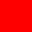

In [3]:
data[:, :] = [255, 0, 0]
image = Image.fromarray(data, 'RGB')
image

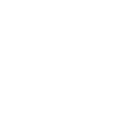

In [21]:
#- 문제 1 -# 가로 세로 각 128 픽셀짜리 흰색 이미지를 만들어 화면에 표시해 봅시다.

data = np.zeros([128, 128, 3], dtype=np.uint8)
data[:, :] = [255, 255, 255]   # 세 가지 숫자를 어떻게 넣냐에 따라 색이 달라짐을 확인할 수 있다
image = Image.fromarray(data, 'RGB')
image

In [28]:
#- 문제 2 -#

from PIL import Image
import os

# 연습용 파일 경로
image_path = os.getenv('HOME')+'/aiffel/python_image_proc/data/pillow_practice.png'

# 이미지 열기
img = Image.open(image_path)
img

# width와 height 출력
print(img.width)
print(img.height)

# JPG 파일 형식으로 저장해보기
new_image_path = os.getenv('HOME')+'/aiffel/python_image_proc/data/jpg_pillow_practice.jpg'
img = img.convert('RGB')  # RGB로 변환해서 img에 저장한다
img.save(new_image_path) 

620
465


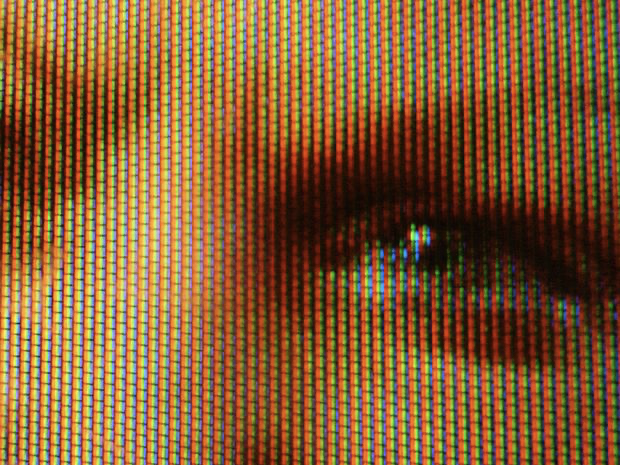

In [32]:
#- 문제 3 -# .resize()를 이용하여 이미지 크기를 100X200으로 변경하여 저장해봅시다.

# 내가 쓴 코드ㅋㅋㅋ
data = np.zeros([100, 200, 3], dtype=np.uint8)
img


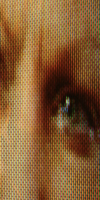

In [33]:
resized_image = img.resize((100,200))  # 위에서 저장되어있던 이미지를 img라고 저장했다. 그래서  img.resize((행 사이즈,열 사이즈)) 
# resize() 사용할거니까 변수이름도 resized_image 라고 정해준다. 

resized_image_path = os.getenv('HOME')+'/aiffel/python_image_proc/data/pillow_practice_resized.png'
# os이용해서 외부파일 불러온다. 아까 처음 저장한 그 img파일 경로 적은거고 resized_image_path 라는 변수로 저장해준다
resized_image.save(resized_image_path)
# .save() 를 이용해서 resized 한 이미지를 resized_image라는 이름 (밑에?) 저장한다
resized_image

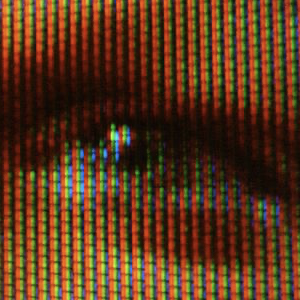

In [37]:
#- 문제 4 -# .crop()을 이용하여 눈 부분만 잘라내어 저장해 봅시다.
# (힌트) 눈 부분의 box 좌표는 (300, 100, 600, 400)입니다.


# 내가 작성한 코드
crop_image = img.crop((300, 100, 600, 400))

crop_image_path = os.getenv('HOME')+'/aiffel/python_image_proc/data/pillow_practice_resized.png'
crop_image.save(crop_image_path)
crop_image

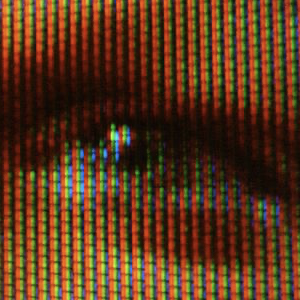

In [38]:
# 정답코드
box = (300, 100, 600, 400)  # 크롭할 박스 좌표를 박스 변수에 저장했다
region = img.crop(box)  
# img를 크롭할거다. 박스 변수를 인자로 넣어주고 region 에 저장해준다. 변수 이름을 설정하는 방법을 다시 생각해 볼 수 있게 되었다

cropped_image_path = os.getenv('HOME')+'/aiffel/python_image_proc/data/pillow_practice_cropped.png'
region.save(cropped_image_path) # 이렇게 하니까 나랑 다른점은 코드 칠때 글자가 적어진다는 거다.. 
region

In [41]:
# 16-4. Pillow를 활용한 데이터 전처리
# CIFAR-100 데이터를 받아 개별 이미지 파일로 추출하기


import os
import pickle  # 파이썬에서는 텍스트 이외의 자료형을 파일로 저장하기 위하여 pickle이라는 모듈을 제공한다.
from PIL import Image

dir_path = os.getenv('HOME')+'/aiffel/python_image_proc/data/cifar-100-python' # 파일 경로
train_file_path = os.path.join(dir_path, 'train') # os.path.join() 파라미터에 생성하고 싶은 경로의 문자열만 입력하면 됩니다 (????)

with open(train_file_path, 'rb') as f: # train_file_path을 
    train = pickle.load(f, encoding='bytes')

print(type(train))
#print(train)   # 혹시 내용이 궁금하다면 주석을 풀고 실행해 보세요. 풀고 확인해 봄!


<class 'dict'>


In [42]:
# 어떤 키들이 있는지 한번 살펴봅니다.
train.keys()

dict_keys([b'filenames', b'batch_label', b'fine_labels', b'coarse_labels', b'data'])

In [43]:
# 특이사항으로는 각 키들이 문자열(str)이 아닌 b로 시작하는 bytes로 되어있다는 점입니다. 
#이에 유의하면서 일단 파일명(b'filenames')들을 한번 살펴봅시다.

type(train[b'filenames'])

list

In [44]:
train[b'filenames'][0:5]

[b'bos_taurus_s_000507.png',
 b'stegosaurus_s_000125.png',
 b'mcintosh_s_000643.png',
 b'altar_boy_s_001435.png',
 b'cichlid_s_000031.png']

In [45]:
# 딕셔너리에 b'data'를 보라는 말 같습니다. 한번 첫 번째를 꺼내 봅시다.
train[b'data'][0:5]

array([[255, 255, 255, ...,  10,  59,  79],
       [255, 253, 253, ..., 253, 253, 255],
       [250, 248, 247, ..., 194, 207, 228],
       [124, 131, 135, ..., 232, 236, 231],
       [ 43,  32,  87, ...,  60,  29,  37]], dtype=uint8)

In [46]:
# numpy 배열이 나왔습니다. 한번 형태를 찍어 봅시다.
train[b'data'][0].shape


(3072,)

3072라는 숫자는 빨강 초록 파랑 3채널 X 1024(=32 * 32)씩 각 화소에 해당하는 것 같습니다. 
그렇다면 이 Numpy 배열을 잘 reshape하면 이미지 파일 원본이 복구된다는 뜻입니다. 
그럼 (32, 32, 3)으로 reshape한 후 이미지를 화면에 출력해 봅시다.

주의해야 할 게 하나 있습니다. 3072바이트의 이미지 데이터는 앞 1024바이트는 빨강(R), 그다음 1024는 녹색(G), 마지막 1024는 파랑(B)으로 되어 있습니다. RGB 순서가 맞는 것은 다행이지만, 그렇다고 그냥 모양만 맞추어 reshape하면 안 됩니다. 
1024를 32X32에 채우는 것을 3번 반복하는 방식의 reshape이어야 합니다. 이렇게 앞선 차원부터 데이터를 채우는 방식의 reshape를 위해 np.reshape에는 order라는 인자가 있습니다. 이 값을 F로 주면 원하는 형태로 진행됩니다.


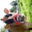

In [48]:
image_data = train[b'data'][0].reshape([32, 32, 3], order='F')   # order를 주의하세요!!
image = Image.fromarray(image_data)    # Pillow를 사용하여 Numpy 배열을 Image객체로 만들어서
image    # 화면에 띄워 봅시다!!

# 축과 Y축이 뒤집어져 나오고 있습니다. 축을 바꿔주는 작업이 필요합니다.
#  np.swapaxes(0, 1)이 유용합니다.

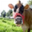

In [49]:
image_data = image_data.swapaxes(0, 1)
image = Image.fromarray(image_data)
image

In [50]:
# 데이터셋에 파일명과 파일 데이터 배열이 순서를 따라 저장되어 있는 것을 확인하였으니,
# 차례차례 Numpy 배열로 읽어서 이를 이미지 파일로 저장해 주는 것은 이미 배운 내용으로 충분할 것 같습니다.

import os
import pickle
from PIL import Image
import numpy
from tqdm import tqdm

dir_path = os.getenv('HOME')+'/aiffel/python_image_proc/data/cifar-100-python'
train_file_path = os.path.join(dir_path, 'train')

# image를 저장할 cifar-100-python의 하위 디렉토리(images)를 생성합니다. 
images_dir_path = os.getenv('HOME')+'/aiffel/python_image_proc/cifar-images'
if not os.path.exists(images_dir_path):
    os.mkdir(images_dir_path)  # images 디렉토리 생성

# 32X32의 이미지 파일 50000개를 생성합니다. 
with open(train_file_path, 'rb') as f:
    train = pickle.load(f, encoding='bytes')
    for i in tqdm(range(len(train[b'filenames']))):
        filename = train[b'filenames'][i].decode()
        data = train[b'data'][i].reshape([32, 32, 3], order='F')
        image = Image.fromarray(data.swapaxes(0, 1))
        image.save(os.path.join(images_dir_path, filename))

100%|██████████| 50000/50000 [00:21<00:00, 2295.71it/s]


16-5. OpenCV 

이미지에서 특정 색을 가진 영역만을 투툴하는 예제를 한번 살펴보자

이미지는 결국 [너비, 높이, 채널] 형태를 가지는 배열,컴퓨터 비전이란 결국 이러한 배열 형태의 데이터를 처리하는 것이 중요

주의: OpenCV에서는 RGB가 아닌 BGR 순서를 사용합니다

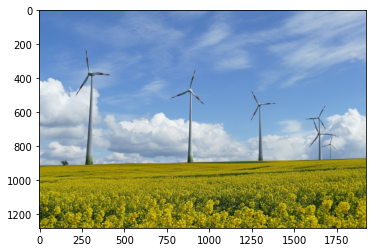

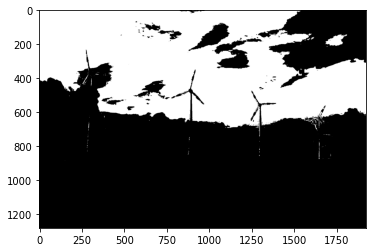

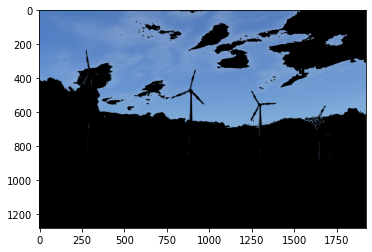

In [51]:
import os
import cv2 as cv
import numpy as np
from  matplotlib import pyplot as plt
%matplotlib inline

img_path = os.getenv('HOME')+'/aiffel/python_image_proc/data/cv_practice.png'
img = cv.imread(img_path)

# Convert BGR to HSV
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)

# define range of blue color in HSV
lower_blue = np.array([100,100,100])
upper_blue = np.array([130,255,255])

# Threshold the HSV image to get only blue colors
mask = cv.inRange(hsv, lower_blue, upper_blue)  # inRange() 그 범위안에 들어가게되면 0으로 만들고 나머지는 1로 만들어 흑백사진을 만든다.

# Bitwise-AND mask and original image  cv2.bitwise_and(img1, img2, mask=None): 각 픽셀에 대해 AND 연산
res = cv.bitwise_and(img, img, mask=mask)  #  AND 연산 후에는 img1과 img2의 흰색 부분이 겹치는 곳만 흰색으로 표시됩

plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv.cvtColor(mask, cv.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv.cvtColor(res, cv.COLOR_BGR2RGB))
plt.show()

In [ ]:
# 자, 전체 코드를 한번 살펴볼 시간을 가지셨다면 이제 한 조각씩 함께 읽어보도록 하겠습니다.

import cv2 as cv
# openCV는 pip으로 설피시 opencv-python 이라는 이름으로 설치해야 하는데, import 힐 때는 cv2라는 이름을 쓴다.
import numpy as np  
# 배열을 처리하는 Numpy도 불러온다.

In [ ]:
img_path = os.getenv('HOME')+'/aiffel/python_image_proc/data/cv_practice.png'
img = cv.imread(img_path)
#imread()호출했다. imread는 파일로부터 이미지를 읽어와 반환해 주는 함수이다.

In [ ]:
# Convert BGR to HSV
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
# cvtColor() 는 컬러 스페이스 변환(convert)을 위한 함수다.

In [ ]:
# define range of blue color in HSV  
lower_blue = np.array([100,100,100])
upper_blue = np.array([130,255,255])

# Threshold the HSV image to get only blue colors
mask = cv.inRange(hsv, lower_blue, upper_blue)
# 위 값을 기준으로 마스크를 생성하는데 여기서 마스크란 마스킹 테이프의 역할과 동일하다. 우리가 원하는 부분만을 떼어낼 수 있도록 하는 역할

In [ ]:
# Bitwise-AND mask and original image
res = cv.bitwise_and(img, img, mask=mask)
# and 비트 연산을 한다는 뜻이지만 여기서는 이 기능이 필요한게 아니라서 같은 사진 두 장을 넣어 동일한 사진이 나오도록 한다
# mask를 넣어줘서 해당 영역만 따오자 

In [ ]:
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.show()

plt.imshow(cv.cvtColor(mask, cv.COLOR_BGR2RGB))
plt.show()

plt.imshow(cv.cvtColor(res, cv.COLOR_BGR2RGB))  
#  OpenCV에서는 BGR 순서다. plt 로 이미지를 보여줄 땐 cv.cvtColor(res, cv.COLOR_BGR2RGB) 함수를 통해 cv 이미지 객체의 컬러를 변환해 줘야 합니다.
plt.show()

참고자료

https://wikidocs.net/47233

https://wayhome25.github.io/cs/2017/04/04/cs-04/
    
https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=zzxx4949&logNo=220714318178

https://bkshin.tistory.com/entry/OpenCV-9-%EC%9D%B4%EB%AF%B8%EC%A7%80-%EC%97%B0%EC%82%B0